In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [42]:
data = pd.read_excel("data/final_exports.xlsx", "Sheet1", index_col=None)

all_data = {}
for col in data.columns:
    all_data[col] = data[col].tolist()
data.columns = all_data.keys()
data.head()


,610910,580210,940360,940161,940429,570242,730830,340111,871200,610130,940490,250810,441820,940440,570242.1
0,1721681,3130,45190,19458,20433,49816,10915,3348,14449,16519,18124,8602,8562,3302,49816
1,2087053,5854,80394,24695,29936,70805,15696,9653,21785,23236,22496,11658,10121,1195,70805
2,2303883,7697,112281,23588,26248,71824,17041,14995,24813,20904,28150,13318,16767,2447,71824
3,2354035,11000,109991,31703,28049,66996,23663,14671,24302,15817,32260,15254,23771,1610,66996
4,2401355,12084,135673,52620,37782,105568,32074,18408,26154,15660,48089,16396,25438,1167,105568


In [43]:
time = np.arange(2003, 2023)

def linear_regression(series):
    """
    Calculate linear regression
    """
    X_train, X_test = time[:-6].reshape(-1, 1), time[-6:].reshape(-1, 1)
    y_train, y_test = series[:-6], series[-6:]
    model = LinearRegression()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = round(mean_squared_error(y_test, preds), 1)
    mae = round(mean_absolute_error(y_test, preds), 1)
    preds_plot = model.predict(time.reshape(-1, 1))
    return preds_plot, mse, mae

In [44]:
def moving_average(series, n):
    """
    Calculate average of last n observations
    """
    y_train, y_test = series[:-6], series[-6:]
    preds = []
    for i in range(len(y_test)):
        avg = np.average(series[-6:-6-i])
        preds.append(avg)

    return preds, round(mean_squared_error(y_test, preds), 1), round(mean_absolute_error(y_test, preds), 1)

In [45]:
def exponential_smoothing(series, alpha):
    """
    Calculate exponential smoothing with given alpha
    """
    y_train, y_test = series[:-6], series[-6:]
    preds = np.repeat(np.average(y_train), 6)
    for i in range(1, 6):
        preds[i] = alpha * y_train[-6 + i - 1] + (1 - alpha) * preds[i - 1]

    return preds, round(mean_squared_error(y_test, preds), 1), round(mean_absolute_error(y_test, preds), 1)

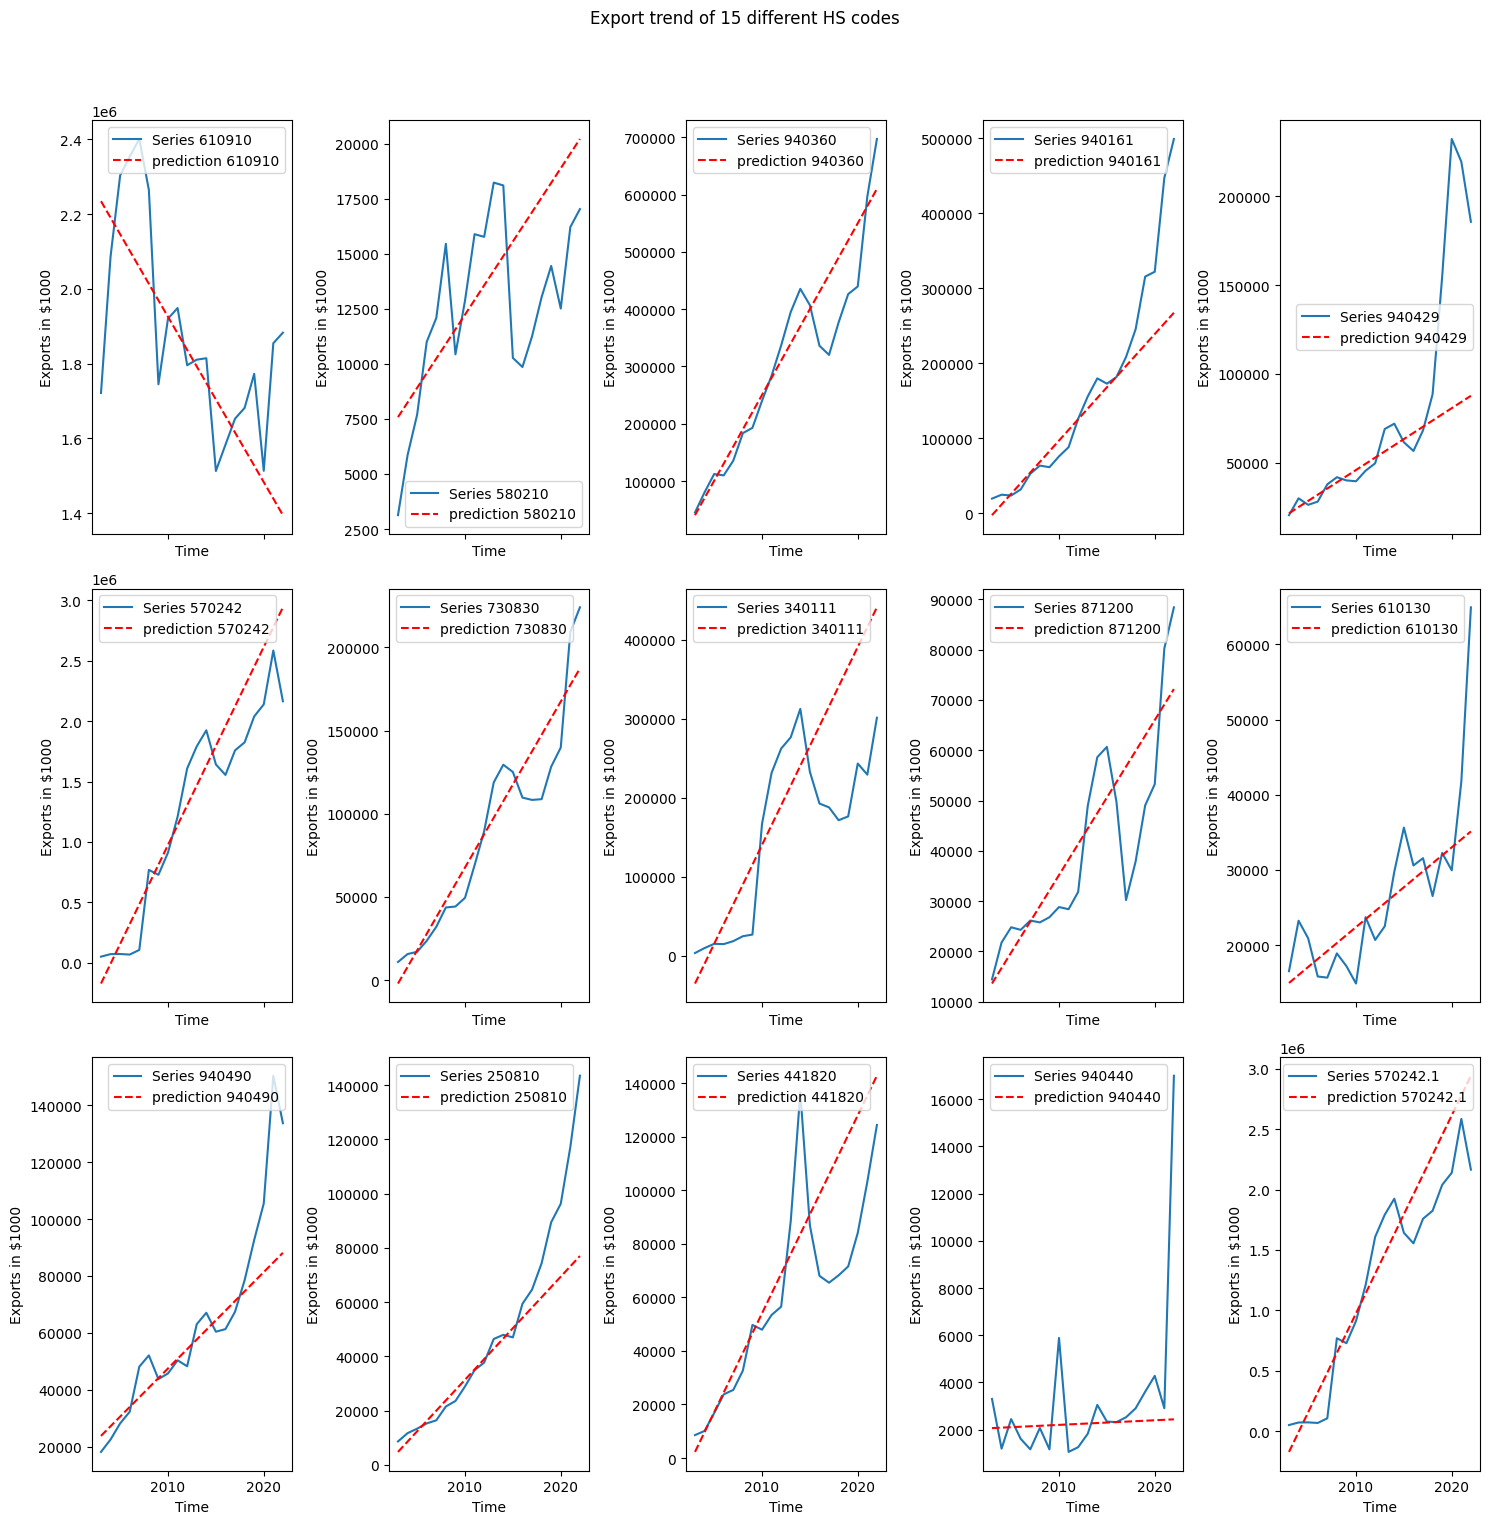

In [46]:
# Plotting the time series
fig, axs = plt.subplots(3, 5, figsize=(15, 16), sharex=True, sharey=None)
fig.suptitle("Export trend of 15 different HS codes")

# Flatten the axs array for easier iteration
axs = axs.flatten()

idx = 0
for hs, i in all_data.items():
    axs[idx].plot(time, i, label=f"Series {hs}")
    axs[idx].legend()
    axs[idx].set_xlabel("Time")
    axs[idx].set_ylabel("Exports in $1000")

    preds, _, _ = linear_regression(i)

    axs[idx].plot(
        time, preds, label=f"prediction {hs}", color="red", linestyle="dashed"
    )
    axs[idx].legend()
    axs[idx].set_xlabel("Time")
    axs[idx].set_ylabel("Exports in $1000")

    idx += 1

# Adjust layout to prevent clipping of labels
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()

In [52]:
predictions_2024 = {}
for hs, i in all_data.items():
    preds, _, _ = linear_regression(i)
    predictions_2024[hs] = round(preds[-1], 2)

predictions_2024

array({'610910': 1394778.77, '580210': 20213.35, '940360': 609897.92, '940161': 267317.65, '940429': 87700.73, '570242': 2942247.65, '730830': 187330.48, '340111': 441052.79, '871200': 72167.47, '610130': 35123.41, '940490': 88129.86, '250810': 77000.41, '441820': 142720.53, '940440': 2437.24, '570242.1': 2942247.65},
      dtype=object)

In [56]:
pd.DataFrame(predictions_2024, index=["2024"]).T.to_csv("data/export_forecasts.csv")